In [1]:
import numpy as np
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

## Chia tỉ lệ 8 : 2

### Giá vàng

In [2]:
# Đường dẫn tới các file csv
file_path = '/content/drive/MyDrive/PTDLKD_Dataset/gold_price_2018_2024.csv'

df = pd.read_csv(file_path)
# In ra bộ dữ liệu
print(df)

            Date  Value (USD per troy ounce)
0     2018-01-01                 1307.018690
1     2018-01-02                 1319.827953
2     2018-01-03                 1311.501862
3     2018-01-04                 1321.635371
4     2018-01-05                 1319.589185
...          ...                         ...
2247  2024-02-26                 2031.609404
2248  2024-02-27                 2033.313814
2249  2024-02-28                 2032.653770
2250  2024-02-29                 2036.199141
2251  2024-03-01                 2044.591310

[2252 rows x 2 columns]


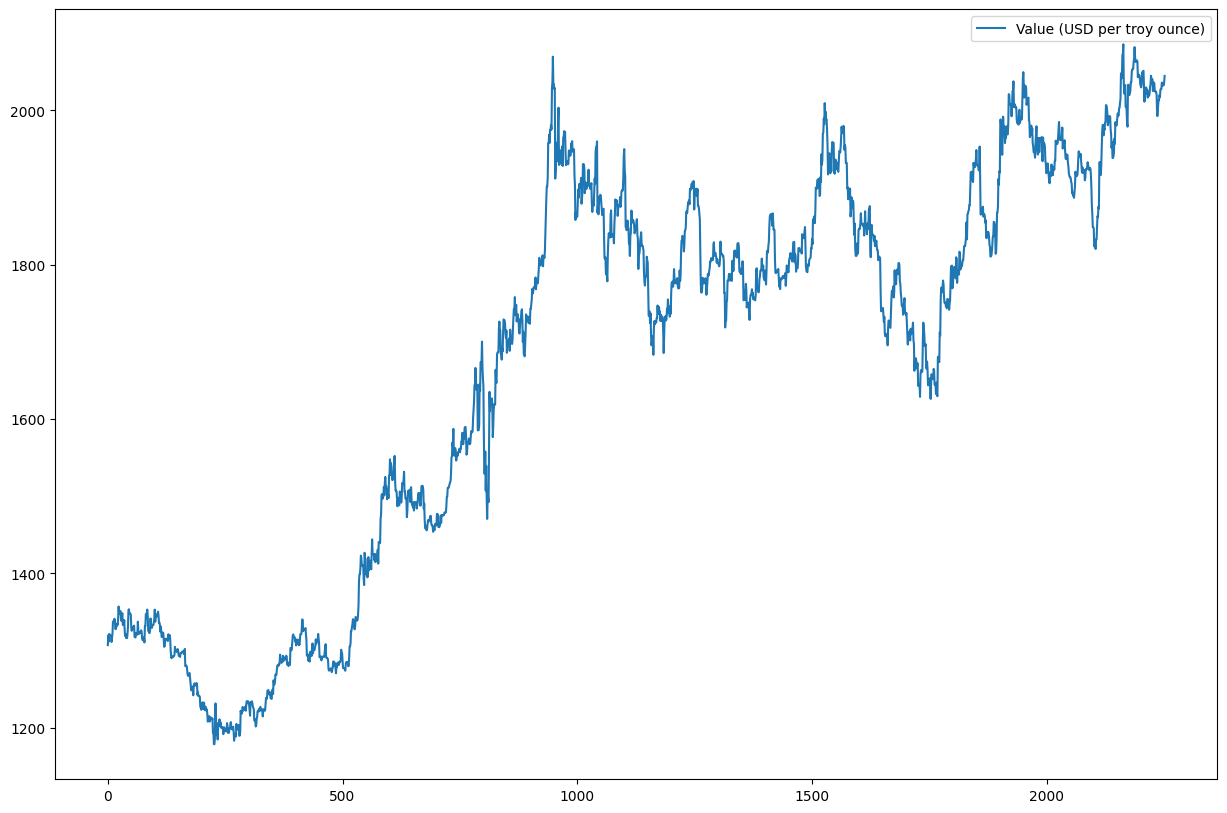

In [3]:
df.plot(figsize=(15,10))
plt.show()

In [4]:
gold_data = df[['Value (USD per troy ounce)']]

In [5]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(gold_data)

In [6]:
# Chia dữ liệu thành dữ liệu huấn luyện và kiểm tra
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

In [7]:
def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [8]:
# Thiết lập tham số cho mô hình
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape lại dữ liệu cho phù hợp với đầu vào của LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [9]:
# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
27/27 [==============================] - 17s 169ms/step - loss: 0.0498
Epoch 2/100
27/27 [==============================] - 5s 168ms/step - loss: 0.0036
Epoch 3/100
27/27 [==============================] - 7s 256ms/step - loss: 0.0016
Epoch 4/100
27/27 [==============================] - 5s 168ms/step - loss: 0.0014
Epoch 5/100
27/27 [==============================] - 5s 170ms/step - loss: 0.0014
Epoch 6/100
27/27 [==============================] - 7s 250ms/step - loss: 0.0014
Epoch 7/100
27/27 [==============================] - 4s 167ms/step - loss: 0.0014
Epoch 8/100
27/27 [==============================] - 5s 188ms/step - loss: 0.0013
Epoch 9/100
27/27 [==============================] - 6s 230ms/step - loss: 0.0013
Epoch 10/100
27/27 [==============================] - 5s 172ms/step - loss: 0.0013
Epoch 11/100
27/27 [==============================] - 5s 201ms/step - loss: 0.0012
Epoch 12/100
27/27 [==============================] - 6s 210ms/step - loss: 0.0012
Epoch 13/100

In [11]:
# Dự đoán giá vàng trên tập kiểm tra
predictions = model.predict(X_test)
predictions = predictions.reshape(-1, 1)
predictions = scaler.inverse_transform(predictions)

11/11 [==============================] - 3s 42ms/step


In [12]:
# Dịch ngược giá trị y_test về dạng gốc để so sánh
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

In [13]:
# Đánh giá mô hình
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 1985.6153142548126


### Giá bạc

In [14]:
# Đường dẫn tới các file csv
file_path = '/content/drive/MyDrive/PTDLKD_Dataset/silver_price_2018_2024.csv'

df = pd.read_csv(file_path)
# In ra bộ dữ liệu
print(df)

            Date  Value (USD per troy ounce)
0     2018-01-01                   16.993771
1     2018-01-02                   17.196475
2     2018-01-03                   17.112426
3     2018-01-04                   17.200338
4     2018-01-05                   17.220985
...          ...                         ...
2247  2024-02-26                   22.800718
2248  2024-02-27                   22.558054
2249  2024-02-28                   22.486938
2250  2024-02-29                   22.507808
2251  2024-03-01                   22.676529

[2252 rows x 2 columns]


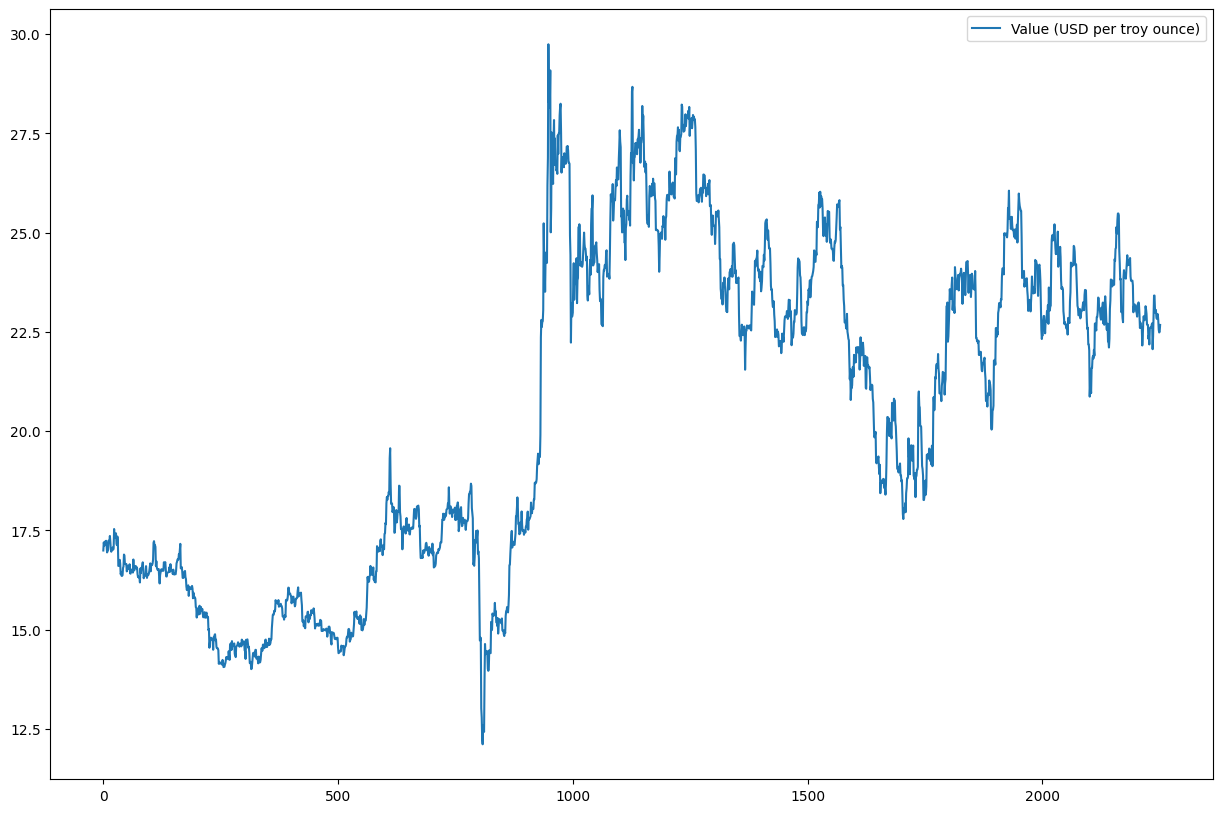

In [15]:
df.plot(figsize=(15,10))
plt.show()

In [16]:
silver_data = df[['Value (USD per troy ounce)']]

In [17]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(silver_data)

In [18]:
# Chia dữ liệu thành dữ liệu huấn luyện và kiểm tra
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

In [19]:
# Thiết lập tham số cho mô hình
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape lại dữ liệu cho phù hợp với đầu vào của LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [20]:
# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
27/27 [==============================] - 14s 285ms/step - loss: 0.0368
Epoch 2/100
27/27 [==============================] - 6s 214ms/step - loss: 0.0037
Epoch 3/100
27/27 [==============================] - 8s 306ms/step - loss: 0.0028
Epoch 4/100
27/27 [==============================] - 5s 180ms/step - loss: 0.0026
Epoch 5/100
27/27 [==============================] - 5s 184ms/step - loss: 0.0025
Epoch 6/100
27/27 [==============================] - 7s 249ms/step - loss: 0.0026
Epoch 7/100
27/27 [==============================] - 5s 182ms/step - loss: 0.0025
Epoch 8/100
27/27 [==============================] - 6s 236ms/step - loss: 0.0021
Epoch 9/100
27/27 [==============================] - 6s 204ms/step - loss: 0.0020
Epoch 10/100
27/27 [==============================] - 5s 171ms/step - loss: 0.0020
Epoch 11/100
27/27 [==============================] - 7s 258ms/step - loss: 0.0019
Epoch 12/100
27/27 [==============================] - 5s 178ms/step - loss: 0.0019
Epoch 13/100

In [ ]:
# Dự đoán giá bạc trên tập kiểm tra
predictions = model.predict(X_test)
predictions = predictions.reshape(-1, 1)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Dịch ngược giá trị y_test về dạng gốc để so sánh
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Đánh giá mô hình
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print('Root Mean Squared Error:', rmse)

### Giá bạch kim

In [ ]:
# Đường dẫn tới các file csv
file_path = '/content/drive/MyDrive/PTDLKD_Dataset/platium_price_2018_2024.csv'

df = pd.read_csv(file_path)
# In ra bộ dữ liệu
print(df)

In [ ]:
df.plot(figsize=(15,10))
plt.show()

In [ ]:
platium_data = df[['Value (USD per troy ounce)']]

In [ ]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(platium_data)

In [ ]:
# Chia dữ liệu thành dữ liệu huấn luyện và kiểm tra
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

In [ ]:
# Thiết lập tham số cho mô hình
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape lại dữ liệu cho phù hợp với đầu vào của LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

In [33]:
# Dự đoán giá bạch kim trên tập kiểm tra
predictions = model.predict(X_test)
predictions = predictions.reshape(-1, 1)
predictions = scaler.inverse_transform(predictions)

11/11 [==============================] - 3s 74ms/step


In [ ]:
# Dịch ngược giá trị y_test về dạng gốc để so sánh
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Đánh giá mô hình
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print('Root Mean Squared Error:', rmse)

## Chia tỉ lệ 7 : 3

### Giá vàng

In [ ]:
# Đường dẫn tới các file csv
file_path = '/content/drive/MyDrive/PTDLKD_Dataset/gold_price_2018_2024.csv'

df = pd.read_csv(file_path)
# In ra bộ dữ liệu
print(df)

In [ ]:
df.plot(figsize=(15,10))
plt.show()

In [ ]:
gold_data = df[['Value (USD per troy ounce)']]

In [ ]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(gold_data)

In [ ]:
# Chia dữ liệu thành dữ liệu huấn luyện và kiểm tra
train_size = int(len(scaled_data) * 0.7)
train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

In [ ]:
# Thiết lập tham số cho mô hình
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape lại dữ liệu cho phù hợp với đầu vào của LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

In [ ]:
# Dự đoán giá vàng trên tập kiểm tra
predictions = model.predict(X_test)
predictions = predictions.reshape(-1, 1)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Dịch ngược giá trị y_test về dạng gốc để so sánh
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Đánh giá mô hình
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print('Root Mean Squared Error:', rmse)

### Giá bạc

In [ ]:
# Đường dẫn tới các file csv
file_path = '/content/drive/MyDrive/PTDLKD_Dataset/silver_price_2018_2024.csv'

df = pd.read_csv(file_path)
# In ra bộ dữ liệu
print(df)

In [ ]:
df.plot(figsize=(15,10))
plt.show()

In [ ]:
silver_data = df[['Value (USD per troy ounce)']]

In [ ]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(silver_data)

In [ ]:
# Chia dữ liệu thành dữ liệu huấn luyện và kiểm tra
train_size = int(len(scaled_data) * 0.7)
train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

In [ ]:
# Thiết lập tham số cho mô hình
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape lại dữ liệu cho phù hợp với đầu vào của LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

In [ ]:
# Dự đoán giá bạc trên tập kiểm tra
predictions = model.predict(X_test)
predictions = predictions.reshape(-1, 1)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Dịch ngược giá trị y_test về dạng gốc để so sánh
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Đánh giá mô hình
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print('Root Mean Squared Error:', rmse)

### Giá bạch kim

In [ ]:
# Đường dẫn tới các file csv
file_path = '/content/drive/MyDrive/PTDLKD_Dataset/platium_price_2018_2024.csv'

df = pd.read_csv(file_path)
# In ra bộ dữ liệu
print(df)

In [ ]:
df.plot(figsize=(15,10))
plt.show()

In [ ]:
platium_data = df[['Value (USD per troy ounce)']]

In [ ]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(platium_data)

In [ ]:
# Chia dữ liệu thành dữ liệu huấn luyện và kiểm tra
train_size = int(len(scaled_data) * 0.7)
train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

In [ ]:
# Thiết lập tham số cho mô hình
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape lại dữ liệu cho phù hợp với đầu vào của LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

In [ ]:
# Dự đoán giá bạch kim trên tập kiểm tra
predictions = model.predict(X_test)
predictions = predictions.reshape(-1, 1)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Dịch ngược giá trị y_test về dạng gốc để so sánh
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Đánh giá mô hình
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print('Root Mean Squared Error:', rmse)

## Chia tỉ lệ 9 : 1

### Giá vàng

In [ ]:
# Đường dẫn tới các file csv
file_path = '/content/drive/MyDrive/PTDLKD_Dataset/gold_price_2018_2024.csv'

df = pd.read_csv(file_path)
# In ra bộ dữ liệu
print(df)

In [ ]:
df.plot(figsize=(15,10))
plt.show()

In [ ]:
gold_data = df[['Value (USD per troy ounce)']]

In [ ]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(gold_data)

In [ ]:
# Chia dữ liệu thành dữ liệu huấn luyện và kiểm tra
train_size = int(len(scaled_data) * 0.9)
train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

In [ ]:
# Thiết lập tham số cho mô hình
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape lại dữ liệu cho phù hợp với đầu vào của LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

In [ ]:
# Dự đoán giá vàng trên tập kiểm tra
predictions = model.predict(X_test)
predictions = predictions.reshape(-1, 1)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Dịch ngược giá trị y_test về dạng gốc để so sánh
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Đánh giá mô hình
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print('Root Mean Squared Error:', rmse)

### Giá bạc

In [ ]:
# Đường dẫn tới các file csv
file_path = '/content/drive/MyDrive/PTDLKD_Dataset/silver_price_2018_2024.csv'

df = pd.read_csv(file_path)
# In ra bộ dữ liệu
print(df)

In [ ]:
df.plot(figsize=(15,10))
plt.show()

In [ ]:
silver_data = df[['Value (USD per troy ounce)']]

In [ ]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(silver_data)

In [ ]:
# Chia dữ liệu thành dữ liệu huấn luyện và kiểm tra
train_size = int(len(scaled_data) * 0.9)
train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

In [ ]:
# Thiết lập tham số cho mô hình
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape lại dữ liệu cho phù hợp với đầu vào của LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

In [ ]:
# Dự đoán giá bạc trên tập kiểm tra
predictions = model.predict(X_test)
predictions = predictions.reshape(-1, 1)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Dịch ngược giá trị y_test về dạng gốc để so sánh
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Đánh giá mô hình
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print('Root Mean Squared Error:', rmse)

### Giá bạch kim

In [ ]:
# Đường dẫn tới các file csv
file_path = '/content/drive/MyDrive/PTDLKD_Dataset/platium_price_2018_2024.csv'

df = pd.read_csv(file_path)
# In ra bộ dữ liệu
print(df)

In [ ]:
df.plot(figsize=(15,10))
plt.show()

In [ ]:
platium_data = df[['Value (USD per troy ounce)']]

In [ ]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(platium_data)

In [ ]:
# Chia dữ liệu thành dữ liệu huấn luyện và kiểm tra
train_size = int(len(scaled_data) * 0.9)
train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

In [ ]:
# Thiết lập tham số cho mô hình
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape lại dữ liệu cho phù hợp với đầu vào của LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

In [ ]:
# Dự đoán giá bạch kim trên tập kiểm tra
predictions = model.predict(X_test)
predictions = predictions.reshape(-1, 1)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Dịch ngược giá trị y_test về dạng gốc để so sánh
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Đánh giá mô hình
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print('Root Mean Squared Error:', rmse)